__ReCare Case Study__ 

__Author: Ravish Aggarwal__

## Required Imports

In [967]:
import pandas as pd
pd.set_option('display.max_rows',20000)
import  matplotlib.pyplot  as plt
import re
import time
import warnings
import numpy as np
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

__Provided data set __

In [968]:
url = '/Users/ravishaggarwal/Desktop/testdataset/dataset_09.2018.json'
data = pd.read_json(url, orient='columns')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()


Number of data points :  61564
Number of features :  11
Features :  ['distance_to_patient_in_km' 'hospital_id' 'id' 'patient_creation'
 'patient_id' 'provider_id' 'request_sent' 'request_status'
 'response_sent' 'solution' 'zipcode']


distance_to_patient_in_km  hospital_id     id          patient_creation  \
0                  19.384312            7  27213  2018-05-09T08:21:07.102Z   
1                   2.262137            8  30545  2018-05-28T08:33:59.711Z   
2                   1.485703            7  27214  2018-05-09T08:21:07.102Z   
3                  21.031890            5  27481  2018-05-08T12:39:32.152Z   
4                   4.290527           15  30085  2018-05-15T08:26:37.497Z   

   patient_id  provider_id              request_sent  request_status  \
0        6593         2631  2018-05-09T08:35:50.860Z               0   
1        6929         1663  2018-05-30T06:00:43.765Z               0   
2        6593         2554  2018-05-09T08:35:50.907Z               1   
3        6560         1880  2018-05-10T08:45:09.607Z               0   
4        6693         2037  2018-05-25T10:55:03.369Z               1   

              response_sent  solution  zipcode  
0                      None         4    85640  
1                      None         1    12689  
2  2018-05-09T08:50:09.810Z         4    85640  
3                      None         4    10369  
4  2018-05-25T12:08:45.196Z         5    12169

In [969]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61564 entries, 0 to 61563
Data columns (total 11 columns):
distance_to_patient_in_km    61564 non-null float64
hospital_id                  61564 non-null int64
id                           61564 non-null int64
patient_creation             61564 non-null object
patient_id                   61564 non-null int64
provider_id                  61564 non-null int64
request_sent                 61564 non-null object
request_status               61564 non-null int64
response_sent                25529 non-null object
solution                     61564 non-null int64
zipcode                      61564 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 5.6+ MB


__except response_sent all the features dont have any NaNs__

## Univariate analysis 

## Feature 1 - 'distance_to_patient_in_km'


__Assuming that this feature tells about how far the provider to the patient__

__Converting the distance to categorical variable__

In [198]:
feature1 = data['distance_to_patient_in_km']

In [220]:
#counting the frequency of occurance of clean_opcodes in the data 
count_dist = data.groupby(['distance_to_patient_in_km']).size().reset_index(name='count')

In [222]:
#majority of the providers are located at a distance of 1.67 Kms from the patients 
count_dist.sort_values('count')

distance_to_patient_in_km  count
0                       0.011414      1
37474                  13.179002      1
37475                  13.179733      1
37476                  13.179834      1
37477                  13.180349      1
37478                  13.180368      1
37479                  13.180424      1
37480                  13.180830      1
37481                  13.181064      1
37482                  13.181288      1
37484                  13.182456      1
37473                  13.178831      1
37485                  13.183150      1
37487                  13.183969      1
37488                  13.184624      1
37489                  13.184719      1
37490                  13.184896      1
37491                  13.185310      1
37492                  13.185803      1
37493                  13.185834      1
37494                  13.185878      1
37495                  13.186704      1
37496                  13.186867      1
37486                  13.183182      1
37472                  13.178705      1
37470                  13.177190      1
37469                  13.176748      1
37445                  13.166363      1
37446                  13.166454      1
37447                  13.166460      1
37448                  13.166819      1
37449                  13.167414      1
37450                  13.168002      1
37451                  13.168065      1
37452                  13.168069      1
37453                  13.169240      1
37454                  13.169492      1
37455                  13.169526      1
37456                  13.170802      1
37458                  13.171255      1
37459                  13.171428      1
37460                  13.171593      1
37461                  13.172129      1
37462                  13.172213      1
37463                  13.172497      1
37464                  13.173747      1
37465                  13.174307      1
37466                  13.174700      1
37467                  13.175448      1
37468                  13.176438      1
37497                  13.186949      1
37499                  13.188016      1
37500                  13.188165      1
37501                  13.188431      1
37535                  13.202961      1
37536                  13.203044      1
37537                  13.203662      1
37538                  13.203993      1
37539                  13.204360      1
37540                  13.204740      1
37541                  13.204853      1
37542                  13.205483      1
37543                  13.206018      1
37544                  13.206285      1
37545                  13.206838      1
37546                  13.206868      1
37547                  13.206991      1
37548                  13.207364      1
37549                  13.208175      1
37550                  13.208705      1
37551                  13.209286      1
37552                  13.209815      1
37554                  13.210342      1
37555                  13.211047      1
37556                  13.211355      1
37557                  13.214951      1
37558                  13.214952      1
37534                  13.202880      1
37444                  13.166269      1
37533                  13.202855      1
37530                  13.202117      1
37502                  13.188651      1
37503                  13.188689      1
37504                  13.189059      1
37505                  13.189505      1
37506                  13.189557      1
37508                  13.189749      1
37509                  13.190006      1
37510                  13.190429      1
37511                  13.190755      1
37512                  13.191305      1
37513                  13.191483      1
37514                  13.191780      1
37516                  13.193015      1
37517                  13.194370      1
37518                  13.194529      1
37519                  13.194637      1
37521                  13.195332      1
37522                  13.197515      1
37523  

In [200]:
sorted_feature1 = feature1.sort_values()

In [201]:
sorted_feature1.head(5)

13754    0.011414
57237    0.018541
30703    0.027196
38066    0.029417
7123     0.030109
Name: distance_to_patient_in_km, dtype: float64

In [202]:
#rounding off the distance to 2 decimal places 

rounded_feature1 = (list(map(lambda x: (round(x, 2)) ,feature1)))
rounded_feature1_df = pd.DataFrame(rounded_feature1)
rounded_feature1_df.columns= ['distance_to_patient_in_km']

In [203]:
rounded_feature1_df.shape

(61564, 1)

In [204]:
rounded_feature1_df.head(3)

distance_to_patient_in_km
0                      19.38
1                       2.26
2                       1.49

__For most of the patients the providers seems to be closer to them.__

__There are some providers approx. 23 which are way to far away from the patient ranging from 200- 500 kms __

__They are potential outliers but due to lack of domain knowledge we are not removing them__ 

In [206]:
#Converting the distance_to_patient_in_km feature to a categorical feature 
#dist. of provider from the patient = x
# We categorize the distance of the provider form the patient into four potentical categories - 
####1. Very good if x <= 5 Kms
####2. Good if 5< x <= 20 Kms
####3. Approachable if 20 < x <= 50 Kms
####4. Bad if 50 < x Kms


def dist_to_cat(x):
    'this function will convert the distance_to_patient_on_km feature to a categorical feature as explained above'
    a = []
    if(x <= 5):
        a.append('VeryGood')
    elif(5< x <= 20):
        a.append('Good')
    elif(20 < x <= 50):
        a.append('Approachable')
    else:
        a.append('Bad')
        
    return a
        
        

In [207]:
categorical_feature1 = []
for i in rounded_feature1:
    categorical_feature1.append(dist_to_cat(i))
    

In [208]:
categorical_feature1[:4]

[['Good'], ['VeryGood'], ['VeryGood'], ['Approachable']]

In [209]:
categorical_feature1 = [item for sublist in categorical_feature1 for item in sublist]

In [210]:
categorical_feature1[:3]

['Good', 'VeryGood', 'VeryGood']

In [211]:
categorical_feature1_df = pd.DataFrame(categorical_feature1)

In [212]:
categorical_feature1_df.columns = ['categorical_distance_to_patient_in_km']

In [213]:
categorical_feature1_df.shape

(61564, 1)

In [214]:
categorical_feature1_df.head(5)

categorical_distance_to_patient_in_km
0                                  Good
1                              VeryGood
2                              VeryGood
3                          Approachable
4                              VeryGood

In [215]:
#one-hot encoded the categorical feature 
df_encode_f1= pd.get_dummies(categorical_feature1_df,prefix=['onehot_f1'])

In [216]:
df_encode_f1.shape

(61564, 4)

In [217]:
df_encode_f1.head(5)

onehot_f1_Approachable  onehot_f1_Bad  onehot_f1_Good  onehot_f1_VeryGood
0                       0              0               1                   0
1                       0              0               0                   1
2                       0              0               0                   1
3                       1              0               0                   0
4                       0              0               0                   1

__feature1= distance_to_patient_in_km is categorized and one hot encoded__

## Univariate analysis 

## Feature 2 - 'hospital_id'

In [218]:
feature2 = data['hospital_id']

In [219]:
feature2.head(3)

0    7
1    8
2    7
Name: hospital_id, dtype: int64

In [175]:
#counting the frequency of occurance of clean_opcodes in the data 
count_hospital = data.groupby(['hospital_id']).size().reset_index(name='count')






In [177]:
count_hospital.sort_values('count')

hospital_id  count
23           29    177
13           19    306
6            11    328
5            10    404
11           16    556
17           23    633
24           31    640
22           28    707
8            13    739
25           32    784
15           21    865
7            12    878
19           25   1252
18           24   1313
14           20   1536
21           27   1565
9            14   1855
12           17   2049
2             7   2149
10           15   2360
20           26   2444
16           22   3367
3             8   3561
4             9   4641
1             5   9810
0             4  16645

__Hospital Id 4 has maximum number of patients__

__one hot encoding of hospital features __

In [182]:

df_encode_f2 = pd.get_dummies(feature2,prefix=['onehot_f2'])

In [183]:
df_encode_f2.shape

(61564, 26)

In [184]:
df_encode_f2.head(5)

['onehot_f2']_4  ['onehot_f2']_5  ['onehot_f2']_7  ['onehot_f2']_8  \
0                0                0                1                0   
1                0                0                0                1   
2                0                0                1                0   
3                0                1                0                0   
4                0                0                0                0   

   ['onehot_f2']_9  ['onehot_f2']_10  ['onehot_f2']_11  ['onehot_f2']_12  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                0                 0                 0                 0   
3                0                 0                 0                 0   
4                0                 0                 0                 0   

   ['onehot_f2']_13  ['onehot_f2']_14        ...         ['onehot_f2']_22  \
0                 0                 0        ...                        0   
1                 0                 0        ...                        0   
2                 0                 0        ...                        0   
3                 0                 0        ...                        0   
4                 0                 0        ...                        0   

   ['onehot_f2']_23  ['onehot_f2']_24  ['onehot_f2']_25  ['onehot_f2']_26  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   ['onehot_f2']_27  ['onehot_f2']_28  ['onehot_f2']_29  ['onehot_f2']_31  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   ['onehot_f2']_32  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 26 columns]

__feature2 = hospital_id is categorized and one hot encoded__

## Univariate analysis 

## Feature 3 - 'id'

__This feature does not provide any information so we will discard this feature in future__

## Univariate analysis 

## Feature 4 - 'patient_creation'


In [246]:
feature4 = data['patient_creation']

In [274]:
feature4.head(9)

0    2018-05-09T08:21:07.102Z
1    2018-05-28T08:33:59.711Z
2    2018-05-09T08:21:07.102Z
3    2018-05-08T12:39:32.152Z
4    2018-05-15T08:26:37.497Z
5    2018-05-11T11:57:23.380Z
6    2018-05-14T10:59:08.546Z
7    2018-05-16T06:21:23.805Z
8    2018-05-15T10:59:21.804Z
Name: patient_creation, dtype: object

__Converting the given time format into unix time stamp __

In [278]:

patient_creation_feature4 = []
for i in feature4:
    patient_creation_feature4.append(int(datetime.strptime(i, '%Y-%m-%dT%H:%M:%S.%fZ').strftime("%s")))
    


In [279]:
patient_creation_feature4[:4]

[1525846867, 1527489239, 1525846867, 1525775972]

In [280]:
patient_creation_feature4_df = pd.DataFrame(patient_creation_feature4)

In [281]:
patient_creation_feature4_df.columns = ['patient_creation_unixtimestamp']

In [282]:
patient_creation_feature4_df.head(4)

patient_creation_unixtimestamp
0                      1525846867
1                      1527489239
2                      1525846867
3                      1525775972

- The data comprises the patient request creation from 

- 07/18/2017 @ 8:25 am till 09/20/2018 @ 12:39 pm approx 15 months 



In [284]:
data['patient_creation_unixtimestamp'] = patient_creation_feature4_df

In [285]:
#counting the frequency of occurance of clean_opcodes in the data 
count_patient_req = data.groupby(['patient_creation_unixtimestamp']).size().reset_index(name='count')


In [286]:
#Acc to the data most of the patient request is sent on 07/26/2018 @ 10:38 am 
count_patient_req .sort_values('count')

__from the unix time stamp we can have two types of features __
1. Convert unix time stamp to date again. This feature will help in time based splitting to  training and test data lateron.
2. Convert the unix time stamp to time. This feature we will further convert it into categorical variable.

In [288]:
#Convert Unix time stamp into understandable date 

ts = int("1284101485")
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d ')) 

2010-09-10 


In [289]:
#Converting the given time format into unix time stamp 
patient_creation_date_f4 = []
for i,r in patient_creation_feature4_df.iterrows():
    patient_creation_date_f4.append(datetime.utcfromtimestamp(r).strftime('%Y-%m-%d '))

In [290]:
patient_creation_date_f4[:4]

['2018-05-09 ', '2018-05-28 ', '2018-05-09 ', '2018-05-08 ']

In [291]:
patient_creation_date_f4_df = pd.DataFrame(patient_creation_date_f4)

In [292]:
patient_creation_date_f4_df.columns = ['patient_request_creation_date']

In [293]:
patient_creation_date_f4_df.shape

(61564, 1)

In [294]:
patient_creation_date_f4_df.head(5)

patient_request_creation_date
0                   2018-05-09 
1                   2018-05-28 
2                   2018-05-09 
3                   2018-05-08 
4                   2018-05-15

In [382]:
#Converting the unix time stamp into the time 24 h clock time format 
patient_creation_time_f4 = []
for i,r in patient_creation_feature4_df.iterrows():
    patient_creation_time_f4.append(time.strftime("%H.%M", time.localtime(int(r))))


In [381]:
time.strftime("%H.%M", time.localtime(int("1525846867")))

'08.21'

In [383]:
patient_creation_time_f4_df = pd.DataFrame(patient_creation_time_f4)





In [384]:
patient_creation_time_f4_df.columns = ['patient_request_creation_time']

In [385]:
patient_creation_time_f4_df.shape

(61564, 1)

In [386]:
patient_creation_time_f4_df.head(5)

patient_request_creation_time
0                         08.21
1                         08.33
2                         08.21
3                         12.39
4                         08.26

In [387]:
patient_creation_time_f4_df= patient_creation_time_f4_df.astype(float)

In [388]:
patient_creation_time_f4_ = []
for i in patient_creation_time_f4:
    patient_creation_time_f4_.append(float(i))
    

In [389]:
len(patient_creation_time_f4_)

61564

In [390]:
#converting time to four categories inspired from the German way of greetings 
#if y is time then 
####guten_morgen - 5am <= y < 10 am
####guten_tag - 10am <= y < 5 pm
####guten_abend - 5pm <= y < 7 pm 
####gute_nacht - 7pm <= y < 5am 



def time_to_cat(y):
    'this function will convert the patient_request_creation_time feature to a categorical feature as explained above'
    b = []
    if( 3.00 <= y < 10.00):
        b.append('Guten_Morgen')
    elif(10.00 <= y < 17.00 ):
        b.append('Guten_tag')
    else:
        b.append('guten_abend')
    
        
    return b

In [391]:
categorical_patient_req_time_f4 = []
for i in patient_creation_time_f4_:
    categorical_patient_req_time_f4 .append(time_to_cat(i))
    #categorical_patient_req_time_f4.append(time_to_cat(i))
    

In [392]:
categorical_patient_req_time_f4[:5]








[['Guten_Morgen'],
 ['Guten_Morgen'],
 ['Guten_Morgen'],
 ['Guten_tag'],
 ['Guten_Morgen']]

In [393]:
categorical_patient_req_time_f4_df = pd.DataFrame(categorical_patient_req_time_f4)

In [394]:
categorical_patient_req_time_f4_df.columns = ['cat_patient_req_time']

In [395]:
categorical_patient_req_time_f4_df.head(4)

cat_patient_req_time
0         Guten_Morgen
1         Guten_Morgen
2         Guten_Morgen
3            Guten_tag

In [396]:
#one hot encoding the feature 
#one hot encoding of hospital features 
df_encode_f4 = pd.get_dummies(categorical_patient_req_time_f4_df,prefix=['onehot_f4'])

In [397]:
df_encode_f4.shape

(61564, 3)

In [398]:
df_encode_f4.head(4)

onehot_f4_Guten_Morgen  onehot_f4_Guten_tag  onehot_f4_guten_abend
0                       1                    0                      0
1                       1                    0                      0
2                       1                    0                      0
3                       0                    1                      0

__ we get two important features __

1. date for time based splitting (patient_creation_time_f4_df) 

2. one hot encoded time (df_encode_f4)

## Univariate analysis 

## Feature 5 - 'patient_id'

In [628]:
feature5 = data['patient_id']

In [629]:
feature5.shape

(61564,)

- Considering patient_id feature we know that there are 3104 unique patients 
- Converting them into the categorical feature will explode the dimensions which is not at all good for training 
- Another strategy is to convert this patient_id into numerical feature 
- Taking the class labels (request_status) into account and converting patient_id into a numerical feature 
- using conditional probability P(request_status = 1 | patient_id)

In [631]:
features5 = data[['patient_id','request_status']]

In [632]:
features5.shape

(61564, 2)

In [610]:
features5.head(5)

patient_id  request_status
0        6593               0
1        6929               0
2        6593               1
3        6560               0
4        6693               1

In [664]:
zero_class = features5.patient_id.loc[features5['request_status'] == 0]
one_class = features5.patient_id.loc[features5['request_status'] == 1]
two_class = features5.patient_id.loc[features5['request_status'] == 2]

In [665]:
print(zero_class.shape)
print(one_class.shape)
print(two_class.shape)
print(features5.shape)

(37252,)
(4177,)
(20135,)
(61564, 2)


In [639]:
list_ = []

for i,r in data.iterrows():
    #print(r['request_status'])
    
    if(r['request_status'] == 0):
        list_.append(zero_class.shape[0]/features5.shape[0])
        #print(10)
        
    elif(r['request_status'] == 1):
        list_.append(one_class.shape[0]/features5.shape[0])
        #print(20)
    else:
        list_.append(two_class.shape[0]/features5.shape[0])
        #print(30)
        
    

In [640]:
len(list_)

61564

In [641]:
list_[:10]

[0.6050938860372945,
 0.6050938860372945,
 0.06784809304138782,
 0.6050938860372945,
 0.06784809304138782,
 0.06784809304138782,
 0.32705802092131764,
 0.6050938860372945,
 0.6050938860372945,
 0.6050938860372945]

In [642]:
patient_id_prob_df = pd.DataFrame(list_)
patient_id_prob_df.columns = ['patient_id_cond_prob']

In [643]:
patient_id_prob_df.columns = ['patient_id_cond_prob']

In [644]:
patient_id_prob_df.head(5)

patient_id_cond_prob
0              0.605094
1              0.605094
2              0.067848
3              0.605094
4              0.067848

## Univariate analysis 

## Feature 6 - 'provider_id'

In [645]:
feature6 = data['provider_id']

In [646]:
feature6.head(5)

0    2631
1    1663
2    2554
3    1880
4    2037
Name: provider_id, dtype: int64

In [647]:
count_provider_id = data.groupby(['provider_id']).size().reset_index(name='count')

In [648]:
count_provider_id

provider_id  count
0               1    116
1               2     55
2               4    357
3               6     32
4               7    294
5               8      6
6               9    111
7              10    253
8              11    306
9              13    174
10             14    455
11             15      4
12             16    239
13             17    136
14             18    397
15             19    398
16             20    222
17             21     25
18             22     15
19             23    154
20             24      6
21             25    513
22             27    150
23             28     32
24             29     34
25             30     23
26             32    218
27             33     49
28             34    142
29             35     72
30             36    104
31             37     82
32             38    181
33             39      2
34             40     84
35             41    481
36             43     69
37             44    419
38             46     36
39             47     78
40             48    302
41             49    410
42             53      2
43             57    119
44             59    175
45             60    103
46             61     97
47             62    125
48             63      3
49             64     45
50             65      4
51             66      3
52             67      2
53             69     26
54             71      1
55             72      1
56             73      3
57             74      6
58             75      5
59             76      4
60             77      6
61             78      3
62             79     16
63             81     28
64             82      9
65             83    125
66             84      6
67             85     11
68             86     56
69             88     36
70             90     82
71             91     19
72             92     23
73             94     34
74             95    245
75             96      1
76             97    279
77             98     14
78             99      5
79            103     30
80            104     21
81            105      2
82            106     56
83            107      3
84            108     60
85            109      8
86            110      7
87            111      2
88            112      3
89            113     11
90            115     41
91            117     53
92            118      1
93            119      5
94            120      8
95            121     27
96            122     61
97            123      7
98            124     10
99            125      3
100           126      1
101           127     94
102           131     95
103           132    253
104           133      1
105           134    375
106           137      4
107           138      1
108           139      1
109           140      1
110           141      4
111           230      7
112           283     32
113           285    320
114           300    142
115           301     48
116           302    143
117           304     53
118           305     66
119           307     29
120           310     87
121           312     69
122           314     41
123           316      1
124           320      5
125           321      4
126           322      2
127           323     12
128           326      6
129           327    160
130           329    196
131           330    157
132           333     12
133           335     59
134           337     12
135           339    112
136           341     25
137           342    114
138           343    379
139           344     26
140           345      9
141           346     21
142           347    182
143           348    130
144           350     87
145           352      1
146           353     61
147           355    119
148           357     92
149           358     85
150           360     48
151           362    110
152           365     65
153           369    115
154           370     71
155           372     96
156           375      1
157           376     61
158           378     68
159   

__DISTRIBUTION__

- here also there 2270 unique providers 
- Considering provider_id feature we know that there are 2270 unique providers 
- Converting them into the categorical feature will explode the dimensions which is not at all good for training 
- Another strategy is to convert this provider_id into numerical feature 
- Taking the class labels (request_status) into account and converting patient_id into a numerical feature 
- using conditional probability P(request_status = 1 | provder_id)


In [650]:
features6 = data[['provider_id','request_status']]



In [651]:
features6.shape

(61564, 2)

In [652]:
features6.head(5)

provider_id  request_status
0         2631               0
1         1663               0
2         2554               1
3         1880               0
4         2037               1

In [666]:
zero_class_ = features6.provider_id.loc[features6['request_status'] == 0]
one_class_ = features6.provider_id.loc[features6['request_status'] == 1]
two_class_ = features6.provider_id.loc[features6['request_status'] == 2]

In [667]:
print(zero_class_.shape)
print(one_class_.shape)
print(two_class_.shape)
print(features6.shape)

(37252,)
(4177,)
(20135,)
(61564, 2)


In [657]:
list_ = []

for i,r in data.iterrows():
    #print(r['request_status'])
    
    if(r['request_status'] == 0):
        list_.append(zero_class.shape[0]/features5.shape[0])
        #print(10)
        
    elif(r['request_status'] == 1):
        list_.append(one_class.shape[0]/features5.shape[0])
        #print(20)
    else:
        list_.append(two_class.shape[0]/features5.shape[0])
        #print(30)

In [658]:
provider_id_prob_df = pd.DataFrame(list_)
provider_id_prob_df.columns = ['provider_id_cond_prob']

In [659]:
#same distribution as that of patient_id, we can use any one of these features in future 

## Univariate analysis 

## Feature 7 - 'request_sent'

In [675]:
feature7 = data['request_sent']

In [676]:
feature7.shape

(61564,)

In [677]:
feature7.head(5)

0    2018-05-09T08:35:50.860Z
1    2018-05-30T06:00:43.765Z
2    2018-05-09T08:35:50.907Z
3    2018-05-10T08:45:09.607Z
4    2018-05-25T10:55:03.369Z
Name: request_sent, dtype: object

In [678]:
#Converting the given time format into unix time stamp 
req_sent_feature7 = []
for i in feature7:
    req_sent_feature7.append(int(datetime.strptime(i, '%Y-%m-%dT%H:%M:%S.%fZ').strftime("%s")))

In [679]:
req_sent_feature7[:4]

[1525847750, 1527652843, 1525847750, 1525934709]

In [680]:
req_sent_feature7_df = pd.DataFrame(req_sent_feature7)

In [681]:
req_sent_feature7_df.columns = ['req_sent_timestamp']

In [682]:
req_sent_feature7_df.head(4)

req_sent_timestamp
0          1525847750
1          1527652843
2          1525847750
3          1525934709

In [684]:
#The data comprises the patient request creation from 

####07/18/2017 @ 9:59 am till 09/20/2018 @ 1:57 pm approx 15 months 
#req_sent_feature7_df.sort_values('req_sent_timestamp')

In [685]:
data['req_sent_unixtimestamp'] = req_sent_feature7_df


__Convert the unix time stamp to time. This feature we will further convert it into categorical variable__

In [972]:
#Converting the unix time stamp into the time 24 h clock time format 
req_sent_time_f7 = []
for i,r in req_sent_feature7_df.iterrows():
    req_sent_time_f7.append(time.strftime("%H.%M", time.localtime(int(r))))



In [687]:
req_sent_time_f7_df = pd.DataFrame(req_sent_time_f7)

In [688]:
req_sent_time_f7_df.columns = ['req_sent_time']

In [689]:
req_sent_time_f7_df.shape

(61564, 1)

In [690]:

req_sent_time_f7_df.head(5)

req_sent_time
0         08.35
1         06.00
2         08.35
3         08.45
4         10.55

In [786]:
#req_sent_time_f7_df= req_sent_time_f7_df.astype(float)

In [692]:
req_sent_time_f7_ = []
for i in req_sent_time_f7:
    req_sent_time_f7_.append(float(i))

In [693]:
len(req_sent_time_f7_)

61564

In [694]:
categorical_req_time_f7 = []
for i in req_sent_time_f7_:
    categorical_req_time_f7 .append(time_to_cat(i))
    #categorical_patient_req_time_f4.append(time_to_cat(i))

In [695]:
categorical_req_time_f7[:5]

[['Guten_Morgen'],
 ['Guten_Morgen'],
 ['Guten_Morgen'],
 ['Guten_Morgen'],
 ['Guten_tag']]

In [696]:
categorical_req_time_f7_df = pd.DataFrame(categorical_req_time_f7)




In [697]:

categorical_req_time_f7_df.columns = ['cat_req_time']

In [698]:
categorical_req_time_f7_df.head(4)

cat_req_time
0  Guten_Morgen
1  Guten_Morgen
2  Guten_Morgen
3  Guten_Morgen

In [699]:
#one hot encoding the feature 
#one hot encoding of hospital features 
df_encode_f7 = pd.get_dummies(categorical_req_time_f7_df,prefix=['onehot_f7'])



In [700]:
df_encode_f7.shape

(61564, 2)

In [701]:
df_encode_f7.head(4)

onehot_f7_Guten_Morgen  onehot_f7_Guten_tag
0                       1                    0
1                       1                    0
2                       1                    0
3                       1                    0

## Univariate analysis 

## Feature 8 - 'request_status'

In [ ]:
#this is a class variable 

In [703]:
feature8 = data['request_status']

In [704]:
#counting the frequency of occurance of clean_opcodes in the data 
count_req_status = data.groupby(['request_status']).size().reset_index(name='count')



In [705]:
#only 6% is the rquired req_status according to the data 
count_req_status   61564

request_status  count
0               0  37252
1               1   4177
2               2  20135

## Univariate analysis 

## Feature 9 - 'response_sent'

In [706]:
feature9 = data['response_sent']

In [707]:
feature9.shape

(61564,)

In [708]:
feature9.head(5)

0                        None
1                        None
2    2018-05-09T08:50:09.810Z
3                        None
4    2018-05-25T12:08:45.196Z
Name: response_sent, dtype: object

In [973]:

def timeFunc(x):
    'convert time to unixtimestamp'
    try:
        return (int(datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ').strftime("%s")))
    except:
        return pd.NaT

In [762]:
res_sent_feature9 = []
for i, r in data.iterrows():
    res_sent_feature9.append(timeFunc(r['response_sent']))

In [763]:
len(res_sent_feature9)

61564

In [765]:
res_sent_feature9_df = pd.DataFrame(res_sent_feature9)

In [766]:
res_sent_feature9_df.columns = ['res_sent_timestamp']

In [767]:
res_sent_feature9_df.head(5)

res_sent_timestamp
0                NaT
1                NaT
2         1525848609
3                NaT
4         1527242925

In [780]:
res_sent_feature9_df_ = res_sent_feature9_df.fillna(0)

In [781]:
res_sent_feature9_df_ .head(5)

res_sent_timestamp
0                   0
1                   0
2          1525848609
3                   0
4          1527242925

In [782]:
#Converting the unix time stamp into the time 24 h clock time format 
res_sent_time_f9 = []
for i,r in res_sent_feature9_df_.iterrows():
    res_sent_time_f9.append(time.strftime("%H.%M", time.localtime(int(r))))



In [783]:
res_sent_time_f9[:5]

['01.00', '01.00', '08.50', '01.00', '12.08']

In [787]:
res_sent_time_f9_ = []
for i in res_sent_time_f9:
    res_sent_time_f9_.append(float(i))

In [788]:
len(res_sent_time_f9_ )

61564

In [791]:
def time_to_cat_mod(z):
    'this function will convert the response_sent_time feature to a categorical feature as explained above'
    b = []
    if(z == 01.00):
        b.append('NoResponse')
    elif( 3.00 <= z < 10.00):
        b.append('Guten_Morgen')
    elif(10.00 <= z < 17.00 ):
        b.append('Guten_tag')
    else:
        b.append('guten_abend')
    
        
    return b

In [792]:
categorical_res_time_f9 = []
for i in res_sent_time_f9_:
    categorical_res_time_f9 .append(time_to_cat_mod(i))
    #categorical_patient_req_time_f4.append(time_to_cat(i))

In [793]:
categorical_res_time_f9[:5]

[['NoResponse'],
 ['NoResponse'],
 ['Guten_Morgen'],
 ['NoResponse'],
 ['Guten_tag']]

In [794]:
categorical_res_time_f9_df = pd.DataFrame(categorical_res_time_f9)

In [795]:
categorical_res_time_f9_df.columns = ['cat_res_time']

In [796]:
categorical_res_time_f9_df.head(4)

cat_res_time
0    NoResponse
1    NoResponse
2  Guten_Morgen
3    NoResponse

In [797]:
#one hot encoding the feature 
#one hot encoding of hospital features 
df_encode_f9 = pd.get_dummies(categorical_res_time_f9_df,prefix=['onehot_f9'])

In [798]:

df_encode_f9.shape

(61564, 4)

In [799]:
df_encode_f9.head(4)

onehot_f9_Guten_Morgen  onehot_f9_Guten_tag  onehot_f9_NoResponse  \
0                       0                    0                     1   
1                       0                    0                     1   
2                       1                    0                     0   
3                       0                    0                     1   

   onehot_f9_guten_abend  
0                      0  
1                      0  
2                      0  
3                      0

## Univariate analysis 

## Feature 10 - 'solution'

In [800]:
feature10 = data['solution']

In [801]:
feature10.shape

(61564,)

In [802]:
feature10.head(4)

0    4
1    1
2    4
3    4
Name: solution, dtype: int64

In [803]:
#It is a categorical feature 
count_solution = data.groupby(['solution']).size().reset_index(name='count')


In [804]:
count_solution.sort_values('count')

solution  count
2         5  10421
0         1  20256
1         4  30887

In [805]:
df_encode_f10 = pd.get_dummies(feature10,prefix=['onehot_f10'])

In [806]:
df_encode_f10.shape

(61564, 3)

In [807]:
df_encode_f10.head(5)

['onehot_f10']_1  ['onehot_f10']_4  ['onehot_f10']_5
0                 0                 1                 0
1                 1                 0                 0
2                 0                 1                 0
3                 0                 1                 0
4                 0                 0                 1

## Univariate analysis 

## Feature 11 - 'zipcode'

In [808]:
feature11 = data['zipcode']

In [809]:
feature11.shape

(61564,)

In [810]:
feature11.head(5)

0    85640
1    12689
2    85640
3    10369
4    12169
Name: zipcode, dtype: int64

In [811]:
count_zip = data.groupby(['zipcode']).size().reset_index(name='count')

In [812]:
count_zip 

zipcode  count
0       8396      1
1      10115     26
2      10117     65
3      10119     35
4      10178    209
5      10179    282
6      10243    267
7      10245    330
8      10247    436
9      10249     68
10     10315   1538
11     10317    406
12     10318   1057
13     10319   1420
14     10365    961
15     10367    741
16     10369    898
17     10405     59
18     10407    201
19     10409     40
20     10435     62
21     10439     71
22     10551    177
23     10553     70
24     10555     53
25     10557     41
26     10559      5
27     10587     81
28     10589     65
29     10623     89
30     10625      8
31     10627     24
32     10629    110
33     10707     61
34     10709    133
35     10711    147
36     10713     93
37     10715      8
38     10717     38
39     10719     47
40     10777     23
41     10779     32
42     10781     41
43     10783    116
44     10785    161
45     10789      7
46     10823     82
47     10825     32
48     10827      4
49     10963     11
50     10969     58
51     10997     19
52     12045      8
53     12047     32
54     12049     11
55     12051      4
56     12053     50
57     12055     13
58     12057     22
59     12059     47
60     12099     73
61     12103     28
62     12105     47
63     12107      9
64     12109      4
65     12157     47
66     12161     50
67     12163     61
68     12165      4
69     12167     26
70     12169     95
71     12203     54
72     12205     32
73     12207     10
74     12209     74
75     12247     68
76     12249     42
77     12277     57
78     12279     36
79     12305      9
80     12309     49
81     12349     65
82     12353     48
83     12355    155
84     12357    113
85     12359     97
86     12435    201
87     12437    142
88     12439    146
89     12459    329
90     12487    283
91     12489     32
92     12524     89
93     12526     60
94     12527     91
95     12529     45
96     12555    387
97     12557    113
98     12559    118
99     12587    156
100    12589     49
101    12619    344
102    12621     41
103    12623    257
104    12627    279
105    12629     67
106    12679    626
107    12681    541
108    12683    521
109    12685    405
110    12687    491
111    12689    473
112    13051    190
113    13053    208
114    13055    912
115    13057    304
116    13059    569
117    13086    133
118    13088    170
119    13089     34
120    13125    111
121    13127     88
122    13156    209
123    13158     17
124    13159     42
125    13187     45
126    13189    147
127    13347    117
128    13349    105
129    13351     95
130    13353     45
131    13355     63
132    13357     49
133    13359     23
134    13403    193
135    13405     10
136    13407     50
137    13409     41
138    13435     53
139    13437    119
140    13465      9
141    13503     85
142    13505      8
143    13507    102
144    13509     27
145    13581     29
146    13583    164
147    13585    137
148    13587     86
149    13589    174
150    13591    114
151    13593    112
152    13595    179
153    13597      9
154    13599    134
155    13627     82
156    14050     63
157    14052     96
158    14055     53
159    14057     67
160    14059     53
161    14089    129
162    14109    126
163    14129    108
164    14163     65
165    14165    404
166    14167     47
167    14169     68
168    14193    187
169    14195     42
170    14197     82
171    14199     92
172    14467    256
173    14469    210
174    14471     27
175    14473    291
176    14476      7
177    14478    269
178    14480    264
179    14482     89
180    14513    181
181    14532    241
182    14542    128
183    14547     24
184    14548     31
185    14552     74
186    14554     67
187    14558     54
188    14612     51
189    14624      9
190    14641     61
191    14669      9
192    14712      3
193    14797      4
194    14822     19
195    14827      1
196    14913     13
197    14943      3
198    14947      5
199  

- Considering provider_id feature we know that there are 423 unique providers 
- Converting them into the categorical feature will explode the dimensions which is not at all good for training 
- Another strategy is to convert this zipcode into numerical feature 
- Taking the class labels (request_status) into account and converting zipcode into a numerical feature 
- using conditional probability P(request_status = 1 | zipcode)

In [813]:
features11 = data[['zipcode','request_status']]

In [814]:
features11.shape

(61564, 2)

In [815]:
zero_class_11 = features11.zipcode.loc[features6['request_status'] == 0]
one_class_11 = features11.zipcode.loc[features6['request_status'] == 1]
two_class_11 = features11.zipcode.loc[features6['request_status'] == 2]

In [826]:
list_ = []

for i,r in data.iterrows():
    #print(r['request_status'])
    
    if(r['request_status'] == 0):
        list_.append(zero_class_11.shape[0]/features5.shape[0])
        #print(10)
        
    elif(r['request_status'] == 1):
        list_.append(one_class_11.shape[0]/features5.shape[0])
        #print(20)
    else:
        list_.append(two_class_11.shape[0]/features5.shape[0])
        #print(30)

In [827]:


        
zip_prob_df = pd.DataFrame(list_)
zip_prob_df.columns = ['zip_prob']

In [828]:
zip_prob_df.head(5)

zip_prob
0  0.605094
1  0.605094
2  0.067848
3  0.605094
4  0.067848

## preparing data for machine learning

In [829]:
#feature 1 distance_to_patient_in_km
df_encode_f1.head(5)

onehot_f1_Approachable  onehot_f1_Bad  onehot_f1_Good  onehot_f1_VeryGood
0                       0              0               1                   0
1                       0              0               0                   1
2                       0              0               0                   1
3                       1              0               0                   0
4                       0              0               0                   1

In [830]:
#feature 2 hospital_id
df_encode_f2.head(5)

['onehot_f2']_4  ['onehot_f2']_5  ['onehot_f2']_7  ['onehot_f2']_8  \
0                0                0                1                0   
1                0                0                0                1   
2                0                0                1                0   
3                0                1                0                0   
4                0                0                0                0   

   ['onehot_f2']_9  ['onehot_f2']_10  ['onehot_f2']_11  ['onehot_f2']_12  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                0                 0                 0                 0   
3                0                 0                 0                 0   
4                0                 0                 0                 0   

   ['onehot_f2']_13  ['onehot_f2']_14        ...         ['onehot_f2']_22  \
0                 0                 0        ...                        0   
1                 0                 0        ...                        0   
2                 0                 0        ...                        0   
3                 0                 0        ...                        0   
4                 0                 0        ...                        0   

   ['onehot_f2']_23  ['onehot_f2']_24  ['onehot_f2']_25  ['onehot_f2']_26  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   ['onehot_f2']_27  ['onehot_f2']_28  ['onehot_f2']_29  ['onehot_f2']_31  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   ['onehot_f2']_32  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 26 columns]

In [831]:
#id DISCARDED

In [832]:
#patient_creation
patient_creation_date_f4_df.head(5)

patient_request_creation_date
0                   2018-05-09 
1                   2018-05-28 
2                   2018-05-09 
3                   2018-05-08 
4                   2018-05-15

In [833]:
#patient_creation
df_encode_f4.head(5)

onehot_f4_Guten_Morgen  onehot_f4_Guten_tag  onehot_f4_guten_abend
0                       1                    0                      0
1                       1                    0                      0
2                       1                    0                      0
3                       0                    1                      0
4                       1                    0                      0

In [834]:
#patient_id
patient_id_prob_df.head(5)

patient_id_cond_prob
0              0.605094
1              0.605094
2              0.067848
3              0.605094
4              0.067848

In [835]:
#provider_id
provider_id_prob_df.head(5)

provider_id_cond_prob
0               0.605094
1               0.605094
2               0.067848
3               0.605094
4               0.067848

In [836]:
#request_sent
df_encode_f7.head(5) 

onehot_f7_Guten_Morgen  onehot_f7_Guten_tag
0                       1                    0
1                       1                    0
2                       1                    0
3                       1                    0
4                       0                    1

In [841]:
#request_status - class label 
data['request_status'].head(5)

0    0
1    0
2    1
3    0
4    1
Name: request_status, dtype: int64

In [838]:
#response_sent
df_encode_f9.head(5)

onehot_f9_Guten_Morgen  onehot_f9_Guten_tag  onehot_f9_NoResponse  \
0                       0                    0                     1   
1                       0                    0                     1   
2                       1                    0                     0   
3                       0                    0                     1   
4                       0                    1                     0   

   onehot_f9_guten_abend  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [839]:
#solution
df_encode_f10.head(5)

['onehot_f10']_1  ['onehot_f10']_4  ['onehot_f10']_5
0                 0                 1                 0
1                 1                 0                 0
2                 0                 1                 0
3                 0                 1                 0
4                 0                 0                 1

In [840]:
#zipcode
zip_prob_df.head(5)

zip_prob
0  0.605094
1  0.605094
2  0.067848
3  0.605094
4  0.067848

In [842]:
#three features-
# zipcode
# provider_id
# patient_id

#These three features show similar conditional prob distributions so we will take one of these for training


In [916]:
df_list = [df_encode_f1, df_encode_f2, patient_creation_date_f4_df, df_encode_f4, df_encode_f7  ,
          df_encode_f9, df_encode_f10, zip_prob_df,data.request_status]

In [917]:
from functools import reduce
df_final = reduce(lambda x, y: x.join(y), df_list)

In [918]:
print('Number of data points : ', df_final.shape[0])
print('Number of features : ', df_final.shape[1])
print('Features : ', df_final.columns.values)
df_final.head()



Number of data points :  61564
Number of features :  45
Features :  ['onehot_f1_Approachable' 'onehot_f1_Bad' 'onehot_f1_Good'
 'onehot_f1_VeryGood' "['onehot_f2']_4" "['onehot_f2']_5"
 "['onehot_f2']_7" "['onehot_f2']_8" "['onehot_f2']_9" "['onehot_f2']_10"
 "['onehot_f2']_11" "['onehot_f2']_12" "['onehot_f2']_13"
 "['onehot_f2']_14" "['onehot_f2']_15" "['onehot_f2']_16"
 "['onehot_f2']_17" "['onehot_f2']_19" "['onehot_f2']_20"
 "['onehot_f2']_21" "['onehot_f2']_22" "['onehot_f2']_23"
 "['onehot_f2']_24" "['onehot_f2']_25" "['onehot_f2']_26"
 "['onehot_f2']_27" "['onehot_f2']_28" "['onehot_f2']_29"
 "['onehot_f2']_31" "['onehot_f2']_32" 'patient_request_creation_date'
 'onehot_f4_Guten_Morgen' 'onehot_f4_Guten_tag' 'onehot_f4_guten_abend'
 'onehot_f7_Guten_Morgen' 'onehot_f7_Guten_tag' 'onehot_f9_Guten_Morgen'
 'onehot_f9_Guten_tag' 'onehot_f9_NoResponse' 'onehot_f9_guten_abend'
 "['onehot_f10']_1" "['onehot_f10']_4" "['onehot_f10']_5" 'zip_prob'
 'request_status']


onehot_f1_Approachable  onehot_f1_Bad  onehot_f1_Good  onehot_f1_VeryGood  \
0                       0              0               1                   0   
1                       0              0               0                   1   
2                       0              0               0                   1   
3                       1              0               0                   0   
4                       0              0               0                   1   

   ['onehot_f2']_4  ['onehot_f2']_5  ['onehot_f2']_7  ['onehot_f2']_8  \
0                0                0                1                0   
1                0                0                0                1   
2                0                0                1                0   
3                0                1                0                0   
4                0                0                0                0   

   ['onehot_f2']_9  ['onehot_f2']_10       ...        onehot_f7_Guten_tag  \
0                0                 0       ...                          0   
1                0                 0       ...                          0   
2                0                 0       ...                          0   
3                0                 0       ...                          0   
4                0                 0       ...                          1   

   onehot_f9_Guten_Morgen  onehot_f9_Guten_tag  onehot_f9_NoResponse  \
0                       0                    0                     1   
1                       0                    0                     1   
2                       1                    0                     0   
3                       0                    0                     1   
4                       0                    1                     0   

   onehot_f9_guten_abend  ['onehot_f10']_1  ['onehot_f10']_4  \
0                      0                 0                 1   
1                      0                 1                 0   
2                      0                 0                 1   
3                      0                 0                 1   
4                      0                 0                 0   

   ['onehot_f10']_5  zip_prob  request_status  
0                 0  0.605094               0  
1                 0  0.605094               0  
2                 0  0.067848               1  
3                 0  0.605094               0  
4                 1  0.067848               1  

[5 rows x 45 columns]

## Machine Learning

## Test, Train and Cross Validation Split

### Splitting data into train, test and cross validation (64:20:16)

In [919]:
#sorting the data according to the patient request date in increasing order
df_final = df_final.sort_values('patient_request_creation_date')

In [920]:
df_final.shape

(61564, 45)

In [921]:
#removing the 'patient_request_creation_date' feature
df_final = df_final.drop('patient_request_creation_date', 1)

In [922]:
y_true = df_final['request_status'].values


In [923]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(df_final, y_true, stratify=y_true, test_size=0.2)

In [924]:
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [925]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 39400
Number of data points in test data: 12313
Number of data points in cross validation data: 9851


In [926]:
train_df.head(5)

onehot_f1_Approachable  onehot_f1_Bad  onehot_f1_Good  \
61096                       0              0               1   
15464                       0              0               1   
4365                        0              0               0   
54863                       0              0               0   
37584                       0              0               1   

       onehot_f1_VeryGood  ['onehot_f2']_4  ['onehot_f2']_5  ['onehot_f2']_7  \
61096                   0                0                0                0   
15464                   0                0                0                0   
4365                    1                0                0                0   
54863                   1                1                0                0   
37584                   0                1                0                0   

       ['onehot_f2']_8  ['onehot_f2']_9  ['onehot_f2']_10       ...        \
61096                0                0                 0       ...         
15464                0                1                 0       ...         
4365                 0                0                 0       ...         
54863                0                0                 0       ...         
37584                0                0                 0       ...         

       onehot_f7_Guten_tag  onehot_f9_Guten_Morgen  onehot_f9_Guten_tag  \
61096                    1                       0                    0   
15464                    0                       0                    0   
4365                     1                       0                    0   
54863                    0                       0                    0   
37584                    0                       0                    0   

       onehot_f9_NoResponse  onehot_f9_guten_abend  ['onehot_f10']_1  \
61096                     1                      0                 0   
15464                     1                      0                 0   
4365                      1                      0                 1   
54863                     1                      0                 0   
37584                     1                      0                 0   

       ['onehot_f10']_4  ['onehot_f10']_5  zip_prob  request_status  
61096                 1                 0  0.605094               0  
15464                 0                 1  0.605094               0  
4365                  0                 0  0.605094               0  
54863                 1                 0  0.605094               0  
37584                 1                 0  0.605094               0  

[5 rows x 44 columns]

__Distribution of class labels in Train, Test and Cross Validation datasets__

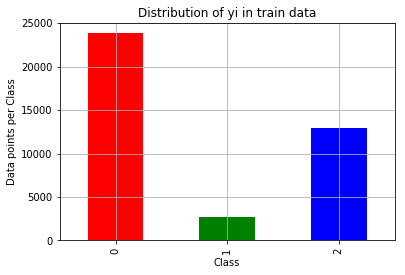

Number of data points in class 1 : 23840 ( 60.508 %)
Number of data points in class 3 : 12886 ( 32.706 %)
Number of data points in class 2 : 2674 ( 6.787 %)
--------------------------------------------------------------------------------


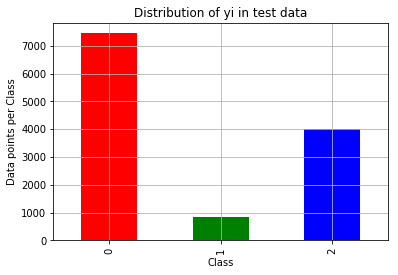

Number of data points in class 1 : 7451 ( 60.513 %)
Number of data points in class 3 : 4027 ( 32.705 %)
Number of data points in class 2 : 835 ( 6.781 %)
--------------------------------------------------------------------------------


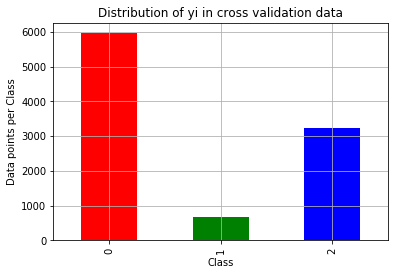

Number of data points in class 1 : 5961 ( 60.512 %)
Number of data points in class 3 : 3222 ( 32.707 %)
Number of data points in class 2 : 668 ( 6.781 %)


In [927]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['request_status'].value_counts().sortlevel()
test_class_distribution = test_df['request_status'].value_counts().sortlevel()
cv_class_distribution = cv_df['request_status'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')


print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


__the class labels show similar distribution in among train, test and cross validation data__

In [928]:
train_df_x = train_df.drop('request_status', 1)
train_df_y = train_df['request_status']
test_df_x = test_df.drop('request_status',1)
test_df_y = test_df['request_status']

cv_df_x = cv_df.drop('request_status',1)
cv_df_y = cv_df['request_status']


print('Number of data points in train data:', train_df_x.shape[0])
print('train data class labels',train_df_y.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('test data class labels',test_df_y .shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])
print('cv data class labels',cv_df_y.shape[0])


Number of data points in train data: 39400
train data class labels 39400
Number of data points in test data: 12313
test data class labels 12313
Number of data points in cross validation data: 9851
cv data class labels 9851


## Prediction using a 'Random' Model

__In a 'Random' Model, we generate the three class probabilites randomly such that they sum to 1__

__The sensible models will provide better results and their loss value is better than that of Random/dumb model__

In [929]:

# This function plots the confusion matrices given y_i, y_i_hat.# This f 
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 3,3 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1,2]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot= True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    


Log loss on Cross Validation Data using Random Model 1.3447337712258163
Log loss on Test Data using Random Model 1.339057051736208
-------------------- Confusion matrix --------------------


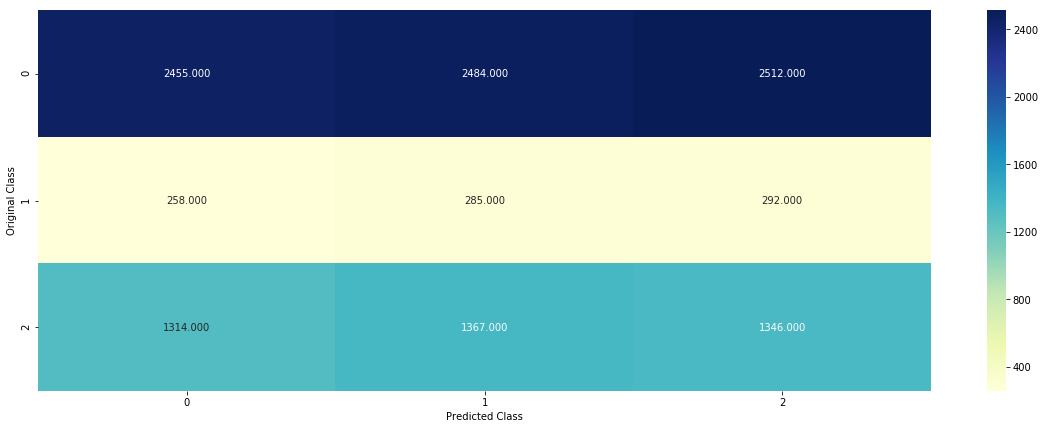

-------------------- Precision matrix (Columm Sum=1) --------------------


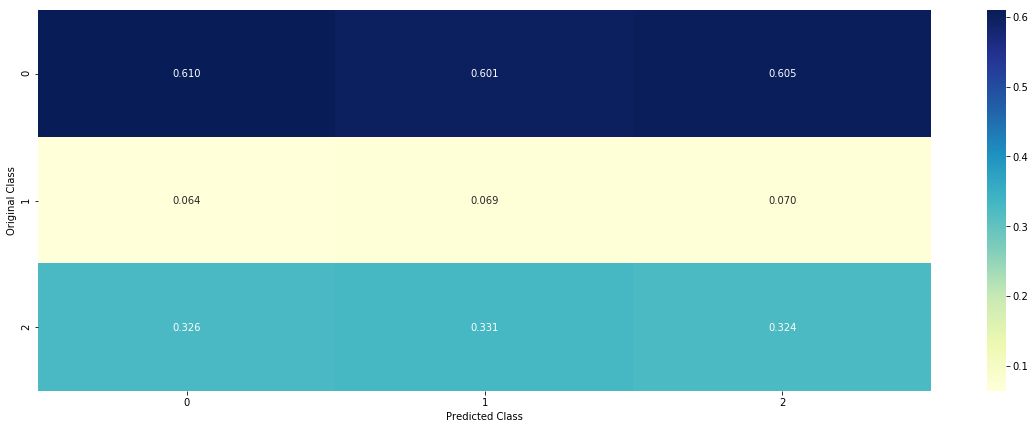

-------------------- Recall matrix (Row sum=1) --------------------


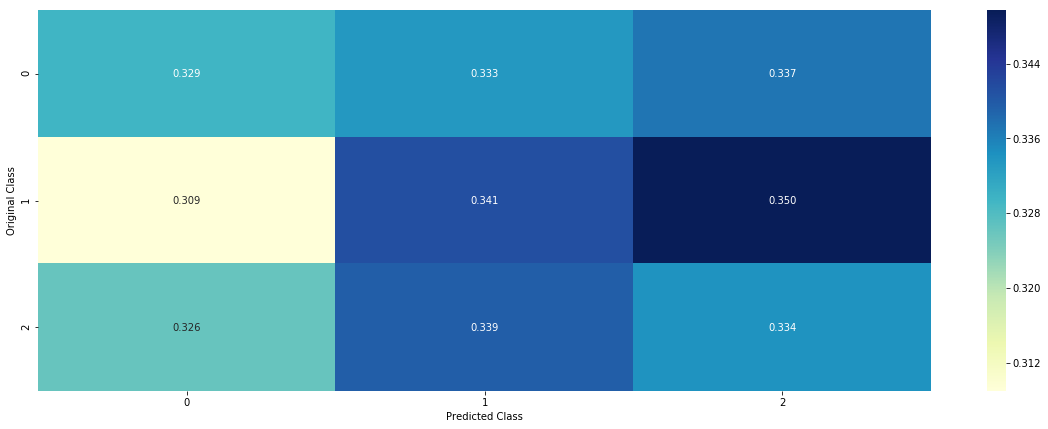

In [930]:
 #we need to generate 3 numbers and the sum of numbers should be 1
# one solution is to genarate 3 numbers and divide each of the numbers by their sum3
test_data_len = test_df_x.shape[0]
cv_data_len = cv_df_x.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,3))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,3)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(cv_df_y,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,3))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,3)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(test_df_y,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(test_df_y, predicted_y)

- The log loss of Random model is 1.33 
- the values from the three matrix is also not good 
- we hope that the classifiers we will use must perform better than this random model

In [976]:
#required functions

def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    'plots confusion matrix'
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)
    
    
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    'log loss'
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)





__we prform three types of learning algorithms __

__In all the algorithms we will first use the train data to train the classifier, use cross validation data to 
get the best value of the hyperparameter and with the best hyperparameter we will perform our predictions using test data__

## Logistic Regression 

## With hyperparameter Tuning 

for alpha = 1e-06
Log Loss : 0.04021724081012007
for alpha = 1e-05
Log Loss : 0.03611297186783311
for alpha = 0.0001
Log Loss : 0.03345010880372969
for alpha = 0.001
Log Loss : 0.04996646110733081
for alpha = 0.01
Log Loss : 0.13770598454556168
for alpha = 0.1
Log Loss : 0.21683661223433873
for alpha = 1
Log Loss : 0.23248379663736995
for alpha = 10
Log Loss : 0.23538715779577005
for alpha = 100
Log Loss : 0.23803138089473813


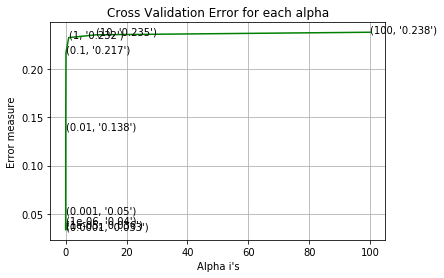

For values of best alpha =  0.0001 The train log loss is: 0.03458161458772338
For values of best alpha =  0.0001 The cross validation log loss is: 0.03345010880372969
For values of best alpha =  0.0001 The test log loss is: 0.032932611647237785


In [949]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df_x, train_df_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df_x, train_df_y)
    sig_clf_probs = sig_clf.predict_proba(cv_df_x)
    cv_log_error_array.append(log_loss(cv_df_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_df_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df_x, train_df_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df_x, train_df_y)

predict_y = sig_clf.predict_proba(train_df_x)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(train_df_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df_x)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cv_df_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df_x)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(test_df_y, predict_y, labels=clf.classes_, eps=1e-15))


__ Testing the model with best hyper paramters__

Log loss : 0.032932611647237785
Number of mis-classified points : 0.005278973442702835
-------------------- Confusion matrix --------------------


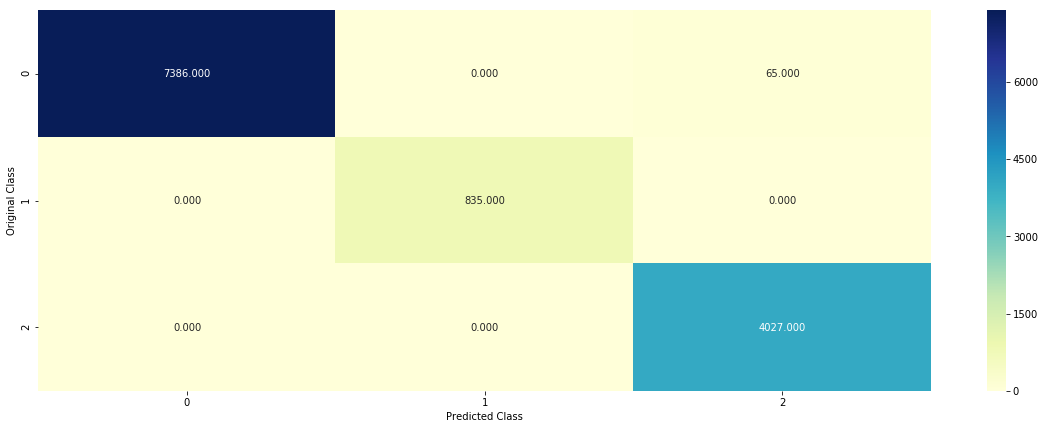

-------------------- Precision matrix (Columm Sum=1) --------------------


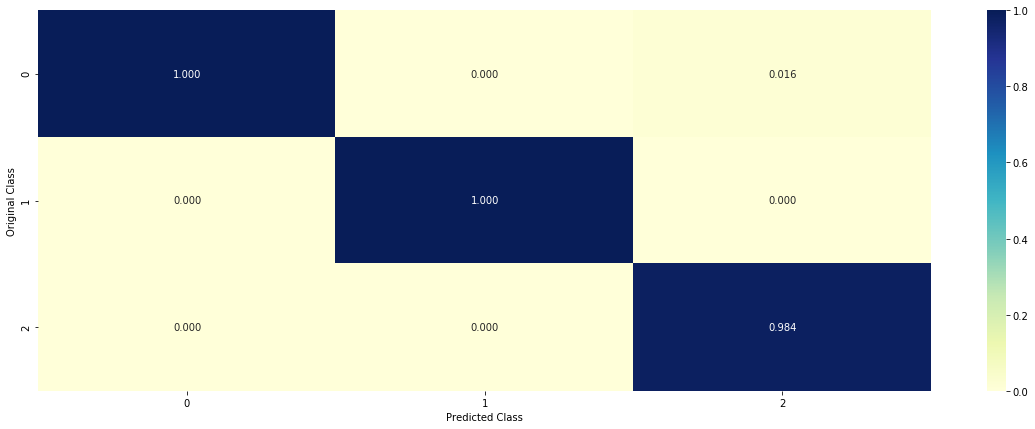

-------------------- Recall matrix (Row sum=1) --------------------


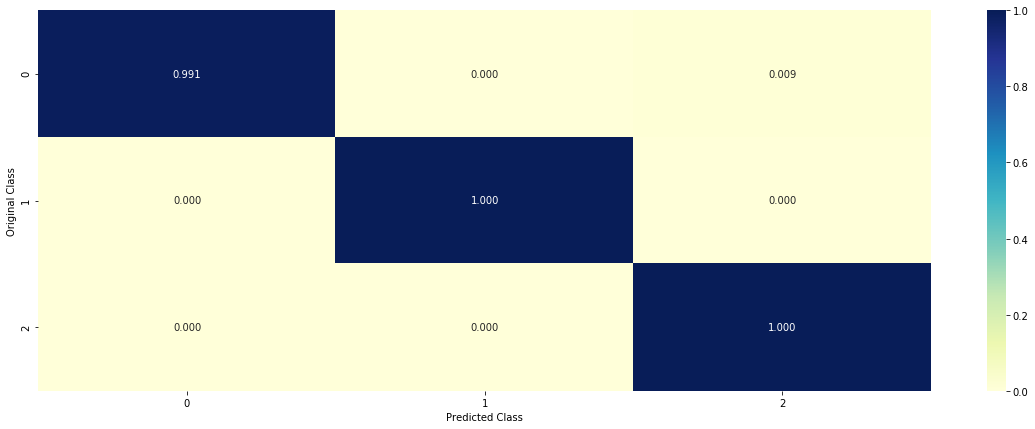

In [950]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df_x, train_df_y, test_df_x, test_df_y, clf)

## Random Forest 

In [945]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df_x, train_df_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df_x, train_df_y)
        sig_clf_probs = sig_clf.predict_proba(cv_df_x)
        cv_log_error_array.append(log_loss(cv_df_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_df_y, sig_clf_probs)) 

for n_estimators = 100 and max depth =  5
Log Loss : 0.0013124854426621907
for n_estimators = 100 and max depth =  10
Log Loss : 0.00033930172050334765
for n_estimators = 200 and max depth =  5
Log Loss : 0.0008047179836891662
for n_estimators = 200 and max depth =  10
Log Loss : 0.0003351453670410093
for n_estimators = 500 and max depth =  5
Log Loss : 0.0006846347745117595
for n_estimators = 500 and max depth =  10
Log Loss : 0.00033057183720934345
for n_estimators = 1000 and max depth =  5
Log Loss : 0.0006277251440414713
for n_estimators = 1000 and max depth =  10
Log Loss : 0.00032909165123201276
for n_estimators = 2000 and max depth =  5
Log Loss : 0.0006433368116513667
for n_estimators = 2000 and max depth =  10
Log Loss : 0.0003334154306696578


In [946]:
best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df_x, train_df_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df_x, train_df_y)

predict_y = sig_clf.predict_proba(train_df_x)
print('For values of best estimator = ', alpha[int(best_alpha)], "The train log loss is:",log_loss(train_df_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df_x)
print('For values of best estimator = ', alpha[int(best_alpha)], "The cross validation log loss is:",log_loss(cv_df_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df_x)
print('For values of best estimator = ', alpha[int(best_alpha)], "The test log loss is:",log_loss(test_df_y, predict_y, labels=clf.classes_, eps=1e-15))

For values of best estimator =  1000 The train log loss is: 0.0003071006421776211
For values of best estimator =  1000 The cross validation log loss is: 0.0003290916512320132
For values of best estimator =  1000 The test log loss is: 0.00033632393203483746


Log loss : 0.00033632393203483757
Number of mis-classified points : 0.0
-------------------- Confusion matrix --------------------


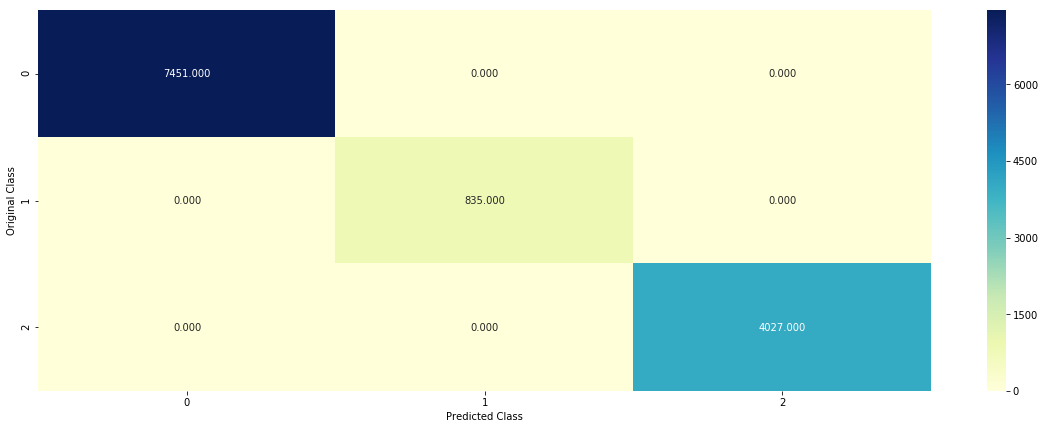

-------------------- Precision matrix (Columm Sum=1) --------------------


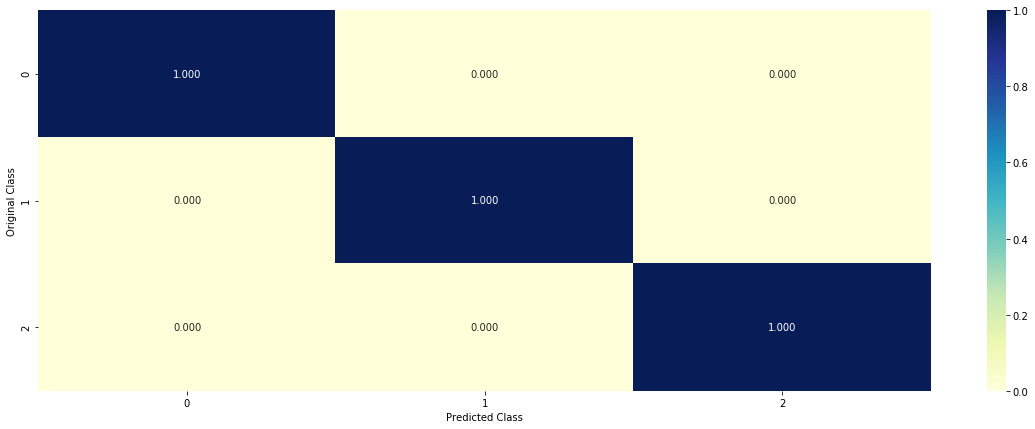

-------------------- Recall matrix (Row sum=1) --------------------


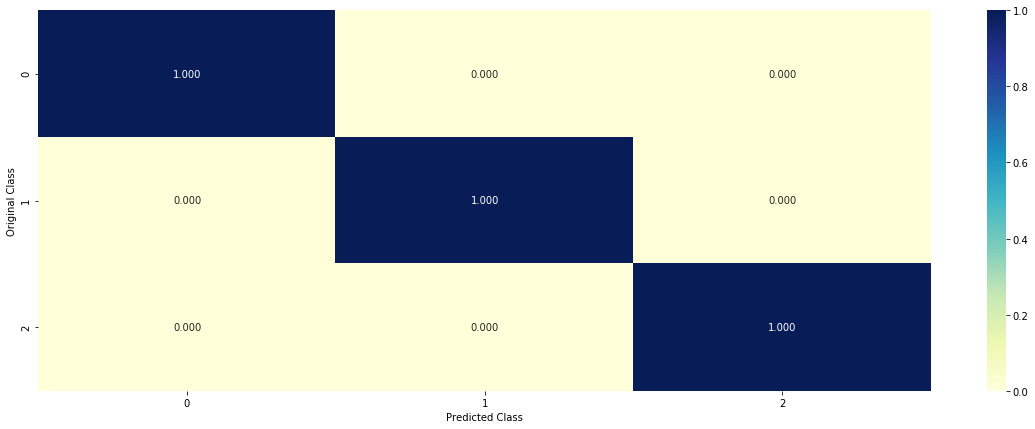

In [947]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_df_x, train_df_y,test_df_x, test_df_y, clf)

__ Although the above two algorithms are performing very well, but for the ake of curiosity let us also stack 
different classification algorithms together and see the performance__

__stacking together__
1. Logistic Regression
2. SVM
3. Naive Bayes

In [965]:
## Stacking Models 

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_df_x, train_df_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_df_x, train_df_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_df_x, train_df_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_df_x, train_df_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_df_y, sig_clf1.predict_proba(cv_df_x))))
sig_clf2.fit(train_df_x, train_df_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_df_y, sig_clf2.predict_proba(cv_df_x))))
sig_clf3.fit(train_df_x, train_df_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_df_y, sig_clf3.predict_proba(cv_df_x))))
print("-"*50)

alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_df_x, train_df_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_df_y, sclf.predict_proba(cv_df_x))))
    log_error =log_loss(cv_df_y, sclf.predict_proba(cv_df_x))
    if best_alpha > log_error:
        best_alpha = log_error
    
 
    


Logistic Regression :  Log Loss: 0.05
Support vector machines : Log Loss: 0.21
Naive Bayes : Log Loss: 0.25
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.530
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.215
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.076
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.025
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.010
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.007


Log loss (train) on the stacking classifier : 0.026299136999402534
Log loss (CV) on the stacking classifier : 0.02542622551185021
Log loss (test) on the stacking classifier : 0.025867102907018803
Number of missclassified point : 0.0062535531552018195
-------------------- Confusion matrix --------------------


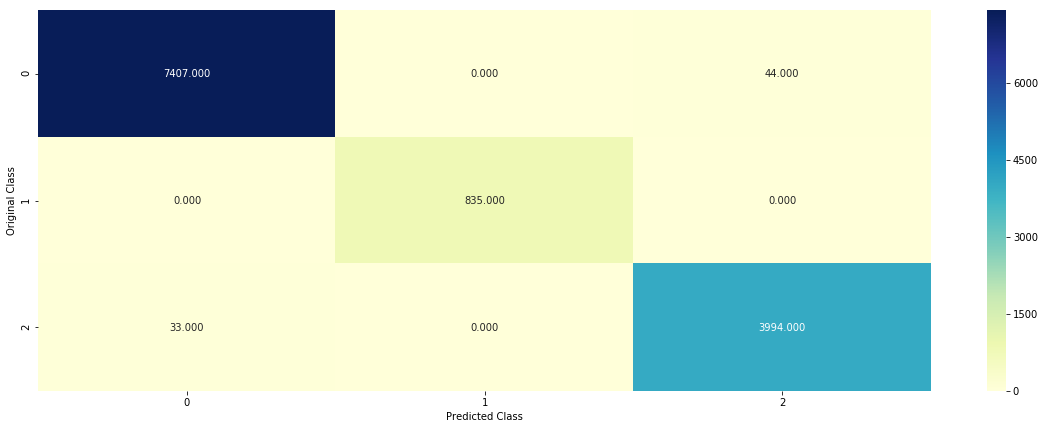

-------------------- Precision matrix (Columm Sum=1) --------------------


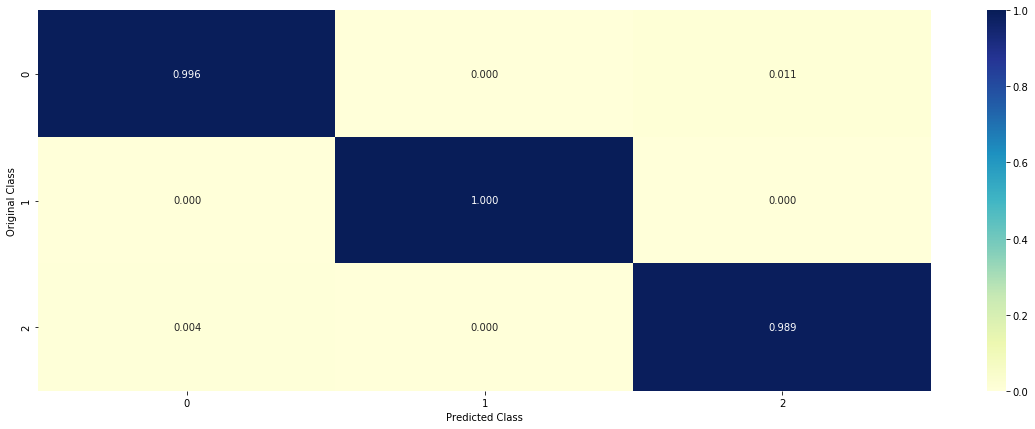

-------------------- Recall matrix (Row sum=1) --------------------


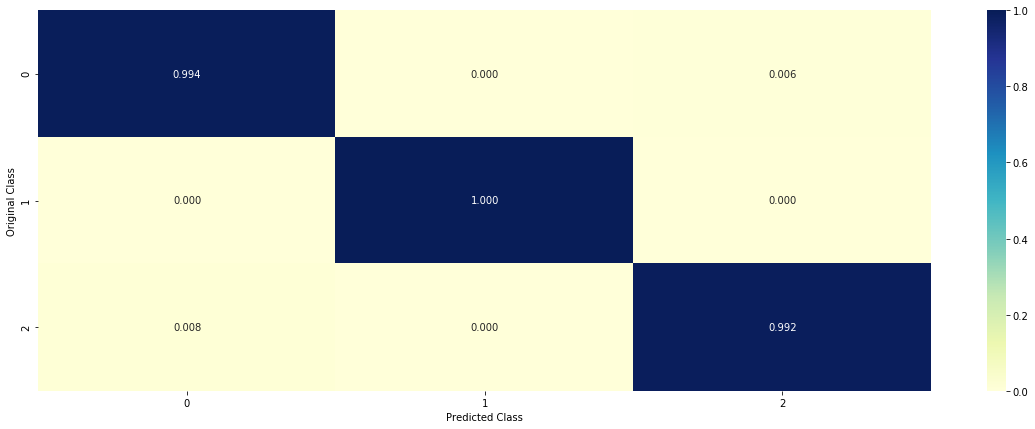

In [966]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_df_x, train_df_y)

log_error = log_loss(train_df_y, sclf.predict_proba(train_df_x))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_df_y, sclf.predict_proba(cv_df_x))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_df_y, sclf.predict_proba(test_df_x))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_df_x)- test_df_y))/test_df_y.shape[0])
plot_confusion_matrix(test_y=test_df_y, predict_y=sclf.predict(test_df_x))